In [1]:
# --- Notebook Cell 1: Imports ---
import numpy as np
import matplotlib.pyplot as plt
from typing import List

# import your dataset + dataloader code
from prepare_imagenet import  get_dataloaders


# Utility to unnormalize ImageNet images for display
IMAGENET_MEAN = np.array([0.485, 0.456, 0.406], dtype=np.float32)
IMAGENET_STD  = np.array([0.229, 0.224, 0.225], dtype=np.float32)

def unnormalize(img: np.ndarray) -> np.ndarray:
    """
    img: [H, W, 3] normalized image
    return: [H, W, 3] unnormalized back to [0,1]
    """
    return np.clip(img * IMAGENET_STD + IMAGENET_MEAN, 0, 1)


def show_batch(images: np.ndarray, labels: np.ndarray, n=16):
    """
    Display a grid of N images.
    images: [B, 3, H, W]
    labels: [B] or None
    """ 
    plt.figure(figsize=(12, 12))
    for i in range(min(n, images.shape[0])):
        plt.subplot(4, 4, i + 1)
        img = images[i]                  # (3, H, W)
        img = np.transpose(img, (1, 2, 0))   # → (H, W, 3)
        img = unnormalize(img)
        plt.imshow(img)
        if labels is not None:
            label = labels[i].item()
            plt.title(f"Label: {label}", fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [2]:
# load datasets
train_loader, test_loader = get_dataloaders(5)

[train] Train directory already exists, skipping train extraction.
[test] Test directory already exists, skipping.
>>> Checking one batch from each loader...


/home/silpasoninallacheruvu/mean-flows/venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Train batch: torch.Size([5, 3, 224, 224]) torch.Size([5])
Test batch: torch.Size([5, 3, 224, 224])
All done. Ready to train!


Train batch: torch.Size([5, 3, 224, 224]) torch.Size([5])


/tmp/ipykernel_5253/1231740857.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  batch_imgs_np = np.array(batch_imgs)
/tmp/ipykernel_5253/1231740857.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  batch_labels_np = np.array(batch_labels)


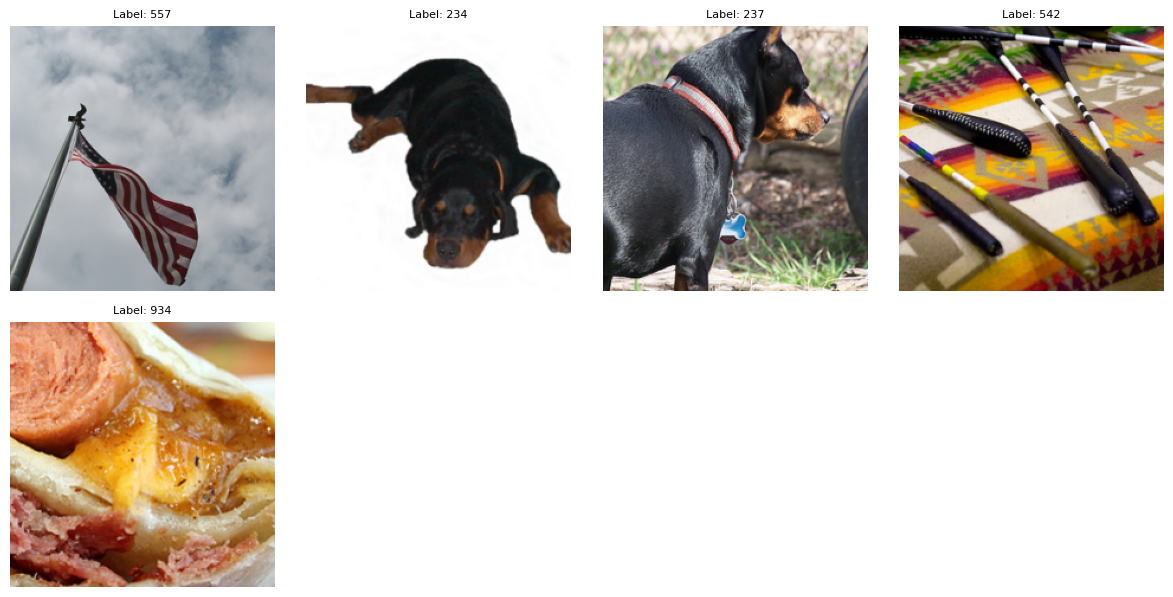

In [3]:
# Fetch one training batch
batch_imgs, batch_labels = next(iter(train_loader))

print("Train batch:", batch_imgs.shape, batch_labels.shape)

# Convert JAX → NumPy
batch_imgs_np = np.array(batch_imgs)
batch_labels_np = np.array(batch_labels)

# Show first 16 images
show_batch(batch_imgs_np, batch_labels_np)

Test batch: torch.Size([5, 3, 224, 224])


/tmp/ipykernel_5253/689107830.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  batch_imgs_np = np.array(batch_imgs)


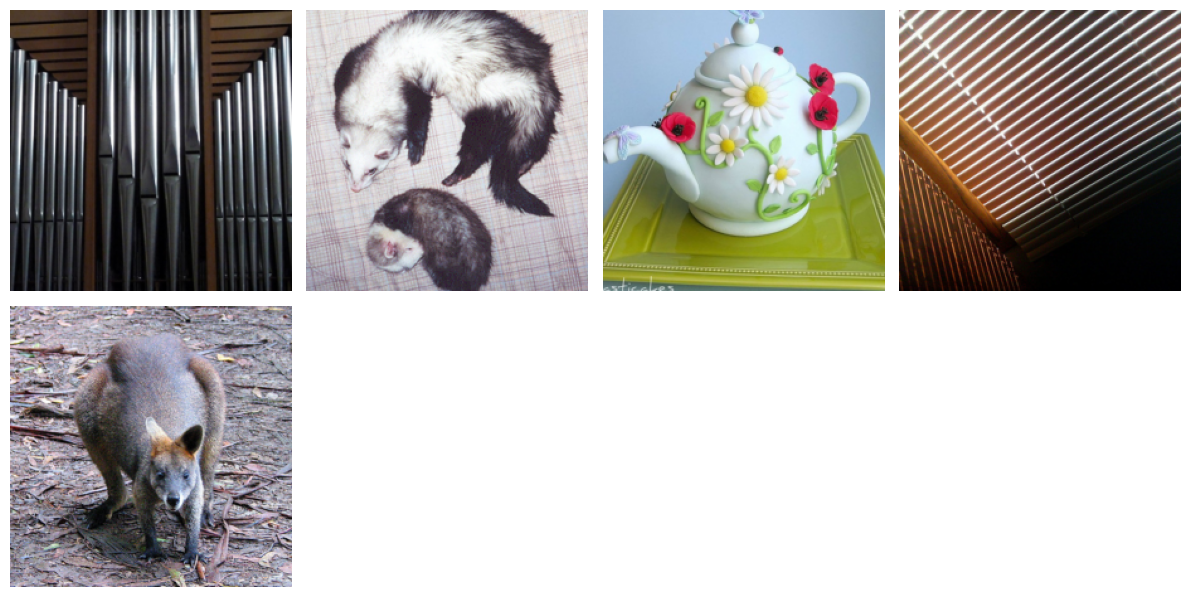

In [4]:
# Fetch one testing batch
batch_imgs, _ = next(iter(test_loader))

print("Test batch:", batch_imgs.shape)

# Convert JAX → NumPy
batch_imgs_np = np.array(batch_imgs)

# Show first 16 images
show_batch(batch_imgs_np, None)

In [1]:
import jax
print(jax.devices())

[CpuDevice(id=0)]
